# Instructions
On this first assignment, applying the basic functions of the Igraph package is required. The following datasets are going to be used:

* Actors dataset - undirected graph - : For the 2005 Graph Drawing conference a data set was provided of the IMDB movie database. We will use a reduced version of this dataset, which derived all actor-actor collaboration edges where the actors co-starred in at least 2 movies together between 1995 and 2004. 


You have to complete the code chunks in this document but also analyze the results, extract insights and answer the short questions. Fill the CSV attached with your answers, sometimes just the number is enough, some others just a small sentence or paragraph. Remember to change the header with your email.

In your submission please upload both this document in HTML and the CSV with the solutions.


# Loading data

In this section, the goal is loading the datasets given, building the graph and analyzing basics metrics. Include the edge or node attributes you consider.

Describe the values provided by summary function on the graph object.

**1) How many nodes are there?**

**2) How many edges are there?**

In [1]:
from igraph import *
import cairo
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
imdb_actor_edges = pd.read_csv("imdb_actor_edges.tsv", sep='\t', encoding= 'unicode_escape')
imdb_actors_key = pd.read_csv("imdb_actors_key.tsv", sep='\t', encoding= 'unicode_escape')

In [3]:
imdb_actors_key.head()

,id,name,movies_95_04,main_genre,genres
0,15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N..."
1,5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3..."
2,11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas..."
3,5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,..."
4,4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi..."


In [4]:
imdb_actor_edges.head()

,from,to,weight
0,17776,17778,6
1,5578,9770,3
2,5578,929,2
3,5578,9982,2
4,1835,6278,2


In [5]:
imdb_actors_key.describe()

,id,movies_95_04
count,17577.000000,17577.000000
mean,8890.989077,20.545258
std,5153.724685,20.686926
min,0.000000,10.000000
25%,4426.000000,12.000000
50%,8880.000000,15.000000
75%,13336.000000,22.000000
max,17915.000000,540.000000


In [6]:
g1 = Graph.DataFrame(imdb_actor_edges, directed=False) #plot(g1)

**1) How many nodes are there?**

In [7]:
print("There are", 
      g1.vcount(),
      "nodes")

There are 17577 nodes


**2) How many edges are there?**

In [8]:
print("There are", 
      g1.ecount(),
      "edges")

There are 287074 edges


# Degree distribution

Analyse the degree distribution. Compute the total degree distribution.

**3) How does this distributions look like?**

**4) What is the maximum degree?**

**5) What is the minum degree?**

In [9]:
g1_degree_dist = pd.DataFrame(g1.degree(mode='all'))
len(g1_degree_dist)

17577

In [10]:
g1_degree_dist.head()

,0
0,8
1,40
2,29
3,6
4,42


In [11]:
len(imdb_actor_edges)

287074

In [12]:
g1_degree_dist.head()

,0
0,8
1,40
2,29
3,6
4,42


**3) How does this distributions look like?**

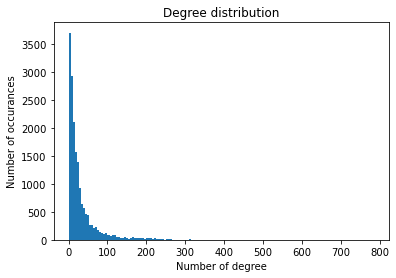

In [13]:
plt.hist(g1_degree_dist, bins=150)

plt.title('Degree distribution')
plt.ylabel('Number of occurances')
plt.xlabel('Number of degree');

The distribution looks clearly righ-skewed as the majority of actors have a low number of degree and have less than 100. Over this number there are just few actors

**4) What is the maximum degree?**

In [14]:
print("The maximum degree is", 
      g1_degree_dist.max().to_string(index=False))

The maximum degree is  784


**5) What is the minum degree?**

In [15]:
print("The minimum degree is", 
      g1_degree_dist.min().to_string(index=False))

The minimum degree is  1


# Network Diameter and Average Path Length

You have functions in igraph to calculate the diameter and the average path length. Think if you should consider the weights, the directions, etc.

**6) What is the diameter of the graph?**

**7) What is the avg path length of the graph?**

I am not taking into account the weights as these are just indicating how many times actors co-worked in the same movie and even if it is once that would be enough to have a connection and build the graph

**6) What is the diameter of the graph?**

In [16]:
print("The diameter is", 
      g1.diameter(directed = False))

The diameter is 16


**7) What is the avg path length of the graph?**

In [17]:
print("The average path length is", 
      g1.average_path_length(directed = False))

The average path length is 4.890545545798965


# Node importance: Centrality measures

(Optional but recommended): Obtain the distribution of the number of movies made by an actor and the number of genres in which an actor starred in. It may be useful to analyze and discuss the results to be obtained in the following exercises.

In [18]:
imdb_actors_key.head()

,id,name,movies_95_04,main_genre,genres
0,15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N..."
1,5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3..."
2,11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas..."
3,5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,..."
4,4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi..."


**Distribution of the number of movies made by an actor**

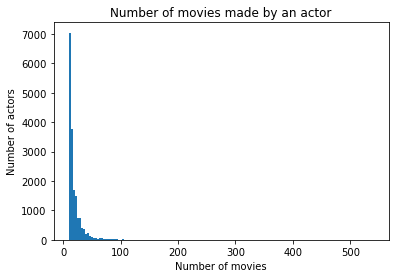

In [19]:
plt.hist(imdb_actors_key['movies_95_04'], bins=150)

plt.title('Number of movies made by an actor')
plt.ylabel('Number of actors')
plt.xlabel('Number of movies');

**Number of genres in which an actor starred in**

In [20]:
genres = []
for line in imdb_actors_key['genres'].to_list():
        genres.append(len(line.split(",")))
imdb_actors_key['n_genres']=genres
imdb_actors_key.head()

,id,name,movies_95_04,main_genre,genres,n_genres
0,15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N...",10
1,5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...",6
2,11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...",11
3,5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,...",8
4,4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi...",8


Obtain three vectors with the degree, betweeness and closeness for each vertex of the actors' graph.

In [21]:
vertex_df = g1.get_vertex_dataframe()

In [22]:
vertex_df['Betweenness'] = g1.betweenness()

In [23]:
vertex_df['Closeness'] = g1.closeness()

In [24]:
vertex_df['Degrees'] = g1.degree()

In [25]:
vertex_df.head()

,name,Betweenness,Closeness,Degrees
vertex ID,,,,
0,0,94.526366,0.168868,8
1,1,9914.327130,0.168930,40
2,2,134403.550820,0.196873,29
3,3,154.697492,0.167262,6
4,4,31566.548050,0.185074,42


In [26]:
actors_final = pd.merge(vertex_df,imdb_actors_key,left_on='name', right_on='id')
actors_final.head()

,name_x,Betweenness,Closeness,Degrees,id,name_y,movies_95_04,main_genre,genres,n_genres
0,0,94.526366,0.168868,8,0,"Tordy, Géza",10,Comedy,"Adventure:1,Animation:1,Comedy:2,Family:1,NULL...",7
1,1,9914.327130,0.168930,40,1,"Reviczky, Gábor",17,Comedy,"Comedy:7,Crime:2,Fantasy:1,Musical:1,NULL:2,Ro...",8
2,2,134403.550820,0.196873,29,2,"Kállai, Ferenc",15,Drama,"Action:1,Comedy:4,Crime:1,Drama:4,Family:1,NUL...",7
3,3,154.697492,0.167262,6,3,"Szilágyi, István (I)",10,Comedy,"Action:1,Comedy:3,Crime:1,Drama:2,Fantasy:1,Ro...",7
4,4,31566.548050,0.185074,42,4,"Rajhona, Ádám",20,Drama,"Action:1,Adventure:2,Animation:1,Comedy:2,Crim...",8


Obtain the list of the 20 actors with the largest degree centrality. It can be useful to show a list with the degree, the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**8) Who is the actor with highest degree centrality?**

**9) How do you explain the high degree of the top-20 list??**

In [27]:
top_20_actors_degree = actors_final.sort_values(by=['Degrees'], ascending = False)[['name_y', 'Degrees','movies_95_04', 'main_genre', 'n_genres']].head(20)
top_20_actors_degree.head(20)

,name_y,Degrees,movies_95_04,main_genre,n_genres
162,"Davis, Mark (V)",784,540,Adult,10
1735,"Sanders, Alex (I)",610,467,Adult,10
1746,"North, Peter (I)",599,460,Adult,8
1794,"Marcus, Mr.",584,435,Adult,6
406,"Tedeschi, Tony",561,364,Adult,11
164,"Dough, Jon",555,300,Adult,8
179,"Stone, Lee (II)",545,403,Adult,7
176,"Voyeur, Vince",533,370,Adult,10
175,"Lawrence, Joel (II)",500,315,Adult,7
160,"Steele, Lexington",493,429,Adult,8


**8) Who is the actor with highest degree centrality?**

In [28]:
top_20_actors_degree.head(1)

,name_y,Degrees,movies_95_04,main_genre,n_genres
162,"Davis, Mark (V)",784,540,Adult,10




**9) How do you explain the high degree of the top-20 list??**

Most of the actors in the top 20 with highest degree centrality are adult's films actors which have appeared in lots of movies as Mark Davis (540 the maximum) and shared stage with a lot of colleagues from the same genre

Obtain the list of the 20 actors with the largest betweenness centrality. Show a list with the betweenness, the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**10) Who is the actor with highest betweenes?**

**11) How do you explain the high betweenness of the top-20 list?**

In [29]:
top_20_actors_Betweenness = actors_final.sort_values(by=['Betweenness'], ascending = False)[['name_y', 'Betweenness','movies_95_04', 'main_genre', 'n_genres']].head(20)
top_20_actors_Betweenness

,name_y,Betweenness,movies_95_04,main_genre,n_genres
2095,"Jeremy, Ron",9.748544e+06,280,Adult,14
3264,"Chan, Jackie (I)",4.716909e+06,59,Comedy,12
561,"Cruz, Penélope",4.330663e+06,46,Drama,13
14281,"Shahlavi, Darren",4.295503e+06,16,Action,9
17028,"Del Rosario, Monsour",4.267099e+06,20,Action,9
284,"Depardieu, Gérard",4.037356e+06,56,Comedy,11
13563,"Bachchan, Amitabh",2.570247e+06,35,Romance,13
1523,"Jackson, Samuel L.",2.539614e+06,97,Drama,14
5045,"Soualem, Zinedine",2.368164e+06,65,Comedy,12
1915,"Del Rio, Olivia",2.316388e+06,84,Adult,6


**10) Who is the actor with highest betweenes?**

In [30]:
top_20_actors_Betweenness.head(1)

,name_y,Betweenness,movies_95_04,main_genre,n_genres
2095,"Jeremy, Ron",9.748544e+06,280,Adult,14


**11) How do you explain the high betweenness of the top-20 list?**

Most of these actors have worked in many different genres, which seems to be reasonable as betweeness is about connecting different nodes, and they are connecting different genres. Also, apart from that, Ron has participated in a huge amount of movies and that is why he is the first in the list

Obtain the list of the 20 actors with the largest closeness centrality. Show a list with the closeness the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**12) Who is the actor with highest closeness centrality?**

**13) How do you explain the high closeness of the top-20 list?**

In [31]:
top_20_actors_Closeness = actors_final.sort_values(by=['Closeness'], ascending = False)[['name_y', 'Closeness','movies_95_04', 'main_genre', 'n_genres']].head(20)
top_20_actors_Closeness

,name_y,Closeness,movies_95_04,main_genre,n_genres
17337,"Shakibai, Khosro",1.0,12,Drama,3
17465,"Kianian, Reza",1.0,11,Thriller,4
17466,"Wood, T.J.",1.0,14,Adult,2
17467,"Sterne, Jeff (II)",1.0,20,Adult,2
17561,"Pickhaver, Greig",1.0,11,Comedy,2
17560,"Walsh, Darren (I)",1.0,18,Comedy,4
17468,"Black, Rick (II)",1.0,11,Adult,2
17558,"Nawrocki, Mike",1.0,20,Family,4
17557,"Vischer, Phil",1.0,20,Family,4
17555,"Poole, Jim",1.0,10,Animation,4


**12) Who is the actor with highest closeness centrality?**

In [32]:
top_20_actors_Closeness.head(1)

,name_y,Closeness,movies_95_04,main_genre,n_genres
17337,"Shakibai, Khosro",1.0,12,Drama,3


**13) How do you explain the high closeness of the top-20 list?**

Closeness is a measure of how long it will take to spread information from v to all other nodes sequentially and it is strange that all actors in the top-20 have closeness 1 because that would mean they are connected to all the rest

# Network Models (Optional)
Explore the Erdös-Renyi model and compare its structural properties to those of real-world networks (actors):

* Degree distribution  P(k)
* Network Diameter and Average Path Length
* (Global and Local) Clustering Coefficient

In [33]:
# Import Required modules
import networkx as nx
import matplotlib.pyplot as plt
import random

In [34]:
# Distribution graph for Erdos_Renyi model
def distribution_graph(g):
    print(nx.degree(g))
    all_node_degree = list(dict((nx.degree(g))).values())
  
    unique_degree = list(set(all_node_degree))
    unique_degree.sort()
    nodes_with_degree = []
    for i in unique_degree:
        nodes_with_degree.append(all_node_degree.count(i))
  
    plt.plot(unique_degree, nodes_with_degree)
    plt.xlabel("Degrees")
    plt.ylabel("No. of nodes")
    plt.title("Degree distribution")
    plt.show()

In [35]:
# Take N number of nodes as input
N = 10

In [36]:
# Take P probability value for edges
P = 0.4

In [37]:
# Create an empty graph object
g = nx.Graph()
  
# Adding nodes
g.add_nodes_from(range(1, N + 1))

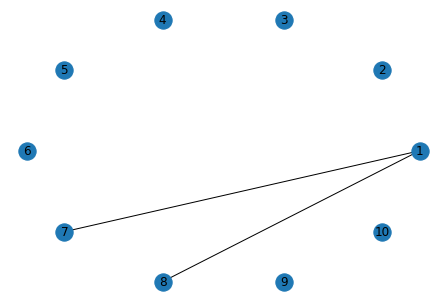

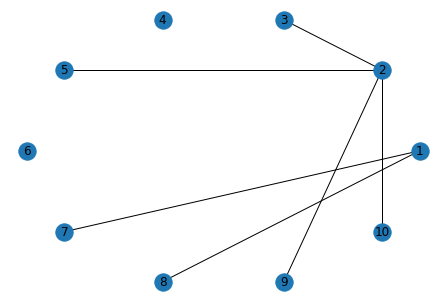

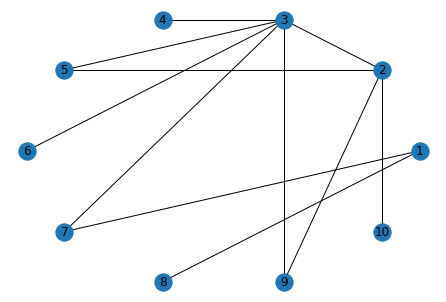

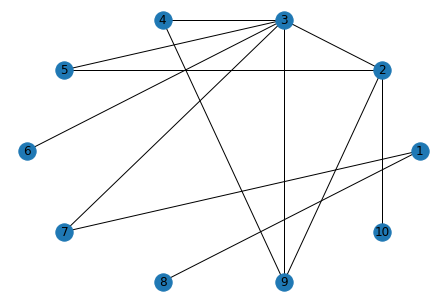

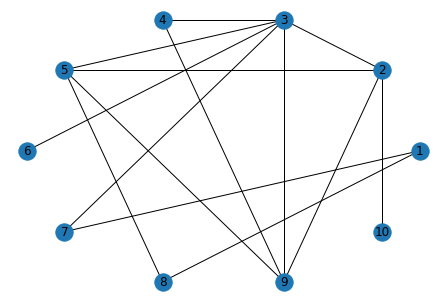

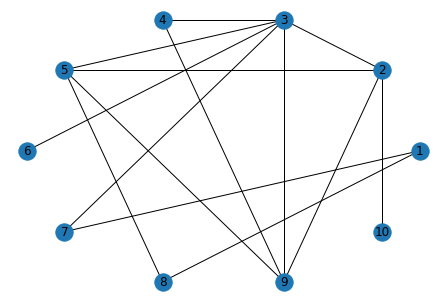

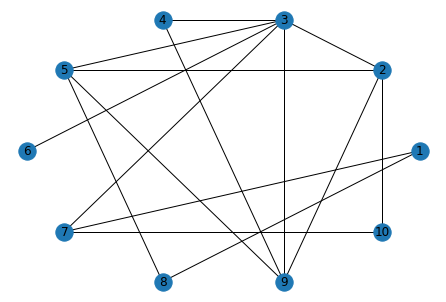

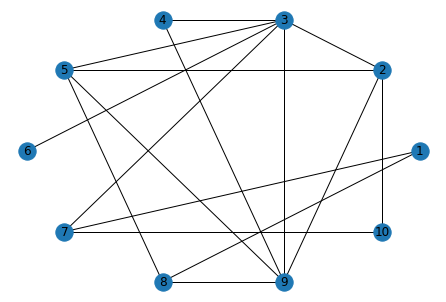

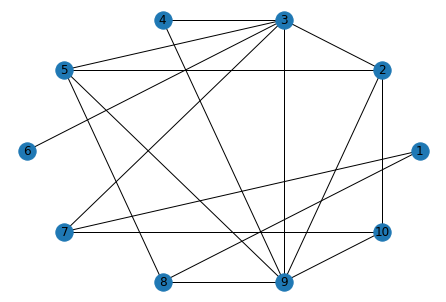

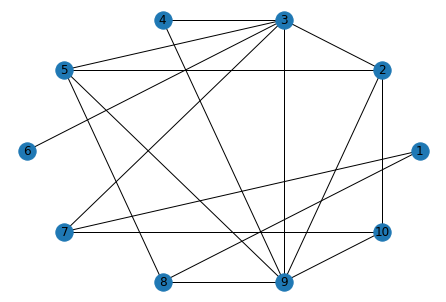

In [38]:
# Add edges to the graph randomly.
for i in g.nodes():
    for j in g.nodes():
        if (i < j):
              
            # Take random number R.
            R = random.random()
              
            # Check if R<P add the edge 
            # to the graph else ignore.
            if (R < P):
                g.add_edge(i, j)
    pos = nx.circular_layout(g)
      
    # Display the social network 
    nx.draw(g, pos, with_labels=1)
    plt.show()

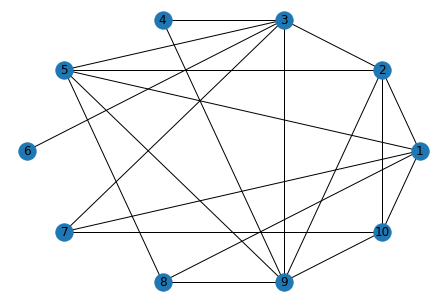

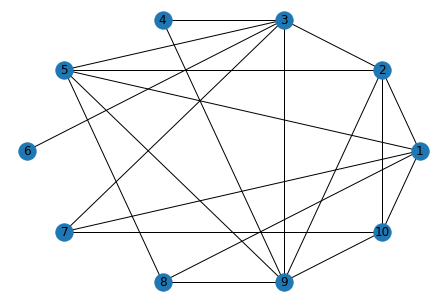

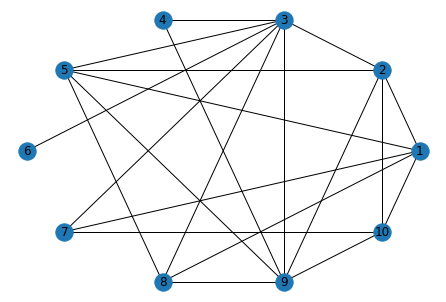

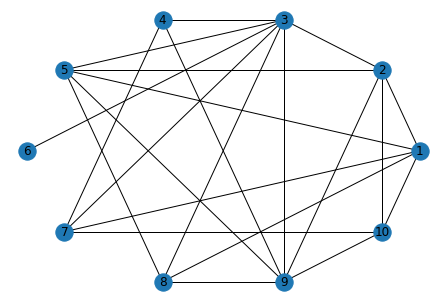

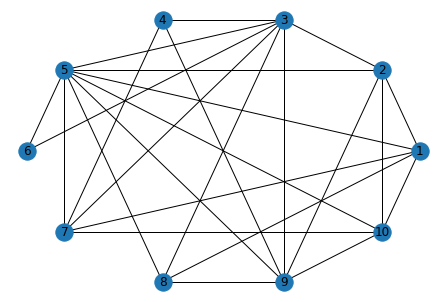

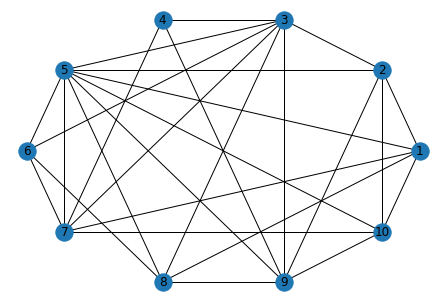

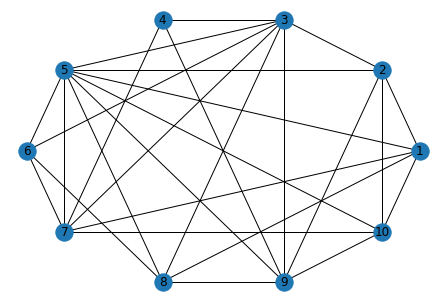

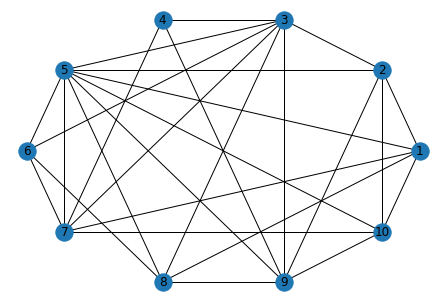

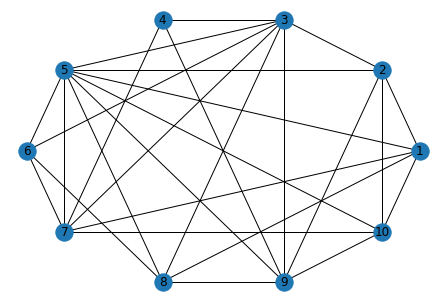

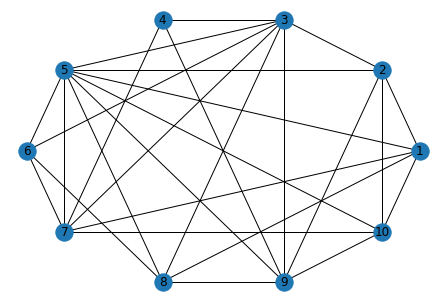

In [39]:
# Add edges to the graph randomly.
for i in g.nodes():
    for j in g.nodes():
        if (i < j):
              
            # Take random number R.
            R = random.random()
              
            # Check if R<P add the edge 
            # to the graph else ignore.
            if (R < P):
                g.add_edge(i, j)
    pos = nx.circular_layout(g)
      
    # Display the social network 
    nx.draw(g, pos, with_labels=1)
    plt.show()

[(1, 5), (2, 5), (3, 7), (4, 3), (5, 8), (6, 4), (7, 6), (8, 5), (9, 6), (10, 5)]


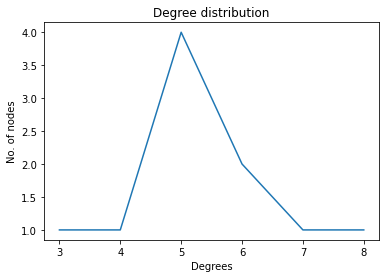

In [40]:
# Display connection between nodes    
distribution_graph(g)